In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns


df = pd.read_csv('../Dataset/all_var_int.csv')
df.describe()

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_58568/1289112181.py:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/all_var_int.csv')


,FID_Key,state_code,district_code,block_code,objectid,stcode11,drought_frq,storm_freq,flood_freq,rural_pop,...,total_reg_workers_ratio,women_reg_workers_ratio,joint_acc_of_women_ratio,num_women_beneficiary_worker_with_acc_ratio,active_women_beneficiary_worker_with_acc_ratio,pmuy_ratio,shg_loan_per_shg,loan_per_shg,ratio_women_reg_workers_with_joint_acc,gw_missing_flag
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,...,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5.815000e+03,5.815000e+03,5815.000000,5815.000000
mean,3744.730181,19.342218,362.509028,3424.578504,3459.751849,19.834910,3.081169,11.045572,22.271883,4.268809e+06,...,0.291178,0.487967,0.065415,0.814762,0.678983,0.247614,2.393990e+04,2.393990e+04,0.125774,0.004471
std,1998.031178,9.939108,195.339992,1951.511798,2106.574036,10.560126,2.103926,9.441698,14.123303,3.745933e+06,...,0.212106,0.112527,0.138342,0.167105,0.169635,0.132712,3.742710e+04,3.742710e+04,0.348387,0.066723
min,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1976.500000,9.000000,192.000000,1709.500000,1566.500000,9.000000,2.000000,3.000000,13.000000,1.569976e+06,...,0.139715,0.434812,0.003759,0.740155,0.584582,0.148857,4.916442e+03,4.916442e+03,0.009136,0.000000
50%,3670.000000,20.000000,356.000000,3408.000000,3289.000000,20.000000,3.000000,7.000000,21.000000,3.293788e+06,...,0.250255,0.480934,0.016412,0.865589,0.694471,0.239051,1.410389e+04,1.410389e+04,0.037012,0.000000
75%,5519.500000,27.000000,517.000000,5085.500000,5394.500000,27.000000,5.000000,20.000000,32.000000,6.076031e+06,...,0.379779,0.518270,0.062226,0.936591,0.801318,0.335610,3.248097e+04,3.248097e+04,0.119173,0.000000
max,7133.000000,38.000000,734.000000,7417.000000,7136.000000,39.000000,8.000000,38.000000,60.000000,3.173207e+07,...,3.654485,0.941742,2.311789,1.000000,1.000000,0.847415,1.705000e+06,1.705000e+06,18.176471,1.000000


In [3]:
cols = ['drought_frq','aridity','coef_variation','lpa_total_rainfall','rainfall_2020','avg_tmax_annual', 'lpa_tmax_90th_temp']
Topography_and_Soil = ['rugged', 'elev_mean','bdod', 'cec', 'cfvo', 'clay', 'sand', 'silt', 'phh_20', 'soc', 'ocd', 'ocs','crop_fraction', 'forest_fraction']
aquifers =['gw_stge_of_extraction']

drought_df = df[cols + Topography_and_Soil + aquifers]

In [6]:
print(drought_df.describe())

       drought_frq       aridity  coef_variation  lpa_total_rainfall  \
count  5815.000000   5815.000000     5815.000000         5815.000000   
mean      3.081169   6655.995948        0.256082         1221.468868   
std       2.103926   4378.205030        0.058608          584.312956   
min       0.000000    548.242864        0.151888          144.199561   
25%       2.000000   3981.042236        0.220456          868.727047   
50%       3.000000   5441.954120        0.248402         1091.098100   
75%       5.000000   7473.910347        0.274588         1389.120488   
max       8.000000  55315.466780        0.629641         4099.690540   

       rainfall_2020  avg_tmax_annual  lpa_tmax_90th_temp       rugged  \
count    5815.000000      5815.000000         5815.000000  5815.000000   
mean     1409.590338        32.278625           32.076359     0.025062   
std       634.054588         3.244748            3.003201     0.085418   
min       178.499894        10.250661           10.5836

In [ ]:
all_columns = drought_df.columns

for column in all_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(drought_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
drought_df['gw_stge_of_extraction'] = df['gw_stge_of_extraction']/100
drought_df['gw_stge_of_extraction'] = 1/(1+df['gw_stge_of_extraction'])

/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_58568/1468535475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['gw_stge_of_extraction'] = df['gw_stge_of_extraction']/100
/var/folders/cd/prkj0t8j32v902v1n0cr3s6h0000gn/T/ipykernel_58568/1468535475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drought_df['gw_stge_of_extraction'] = 1/(1+df['gw_stge_of_extraction'])


In [7]:
Rscaler = RobustScaler()
minmax = MinMaxScaler()

df_scaled = drought_df.copy()

mmcols = ['drought_frq']

cols = ['aridity', 'lpa_total_rainfall',
       'rainfall_2020', 'avg_tmax_annual', 'lpa_tmax_90th_temp',
       'elev_mean', 'bdod', 'cec', 'cfvo', 'clay', 'sand', 'silt', 'phh_20',
       'soc', 'ocd', 'ocs','gw_stge_of_extraction']

df_scaled[cols] = Rscaler.fit_transform(df_scaled[cols])

In [8]:
df_pca = df_scaled.copy()
df_pca.replace('', np.nan, inplace=True)
df_pca = df_pca.astype(float)
pca = PCA()
pca.fit(df_pca)

PCA()

In [9]:
pcaSummary_df = pd.DataFrame({
            '% variance': pca.explained_variance_ratio_,
            'Cumulative %': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)


,% variance,Cumulative %
0,0.606,0.606
1,0.161,0.767
2,0.081,0.848
3,0.061,0.909
4,0.025,0.934
5,0.024,0.958
6,0.019,0.976
7,0.006,0.983
8,0.004,0.987
9,0.004,0.990


In [10]:
PCA_weights = pcaSummary_df['% variance']

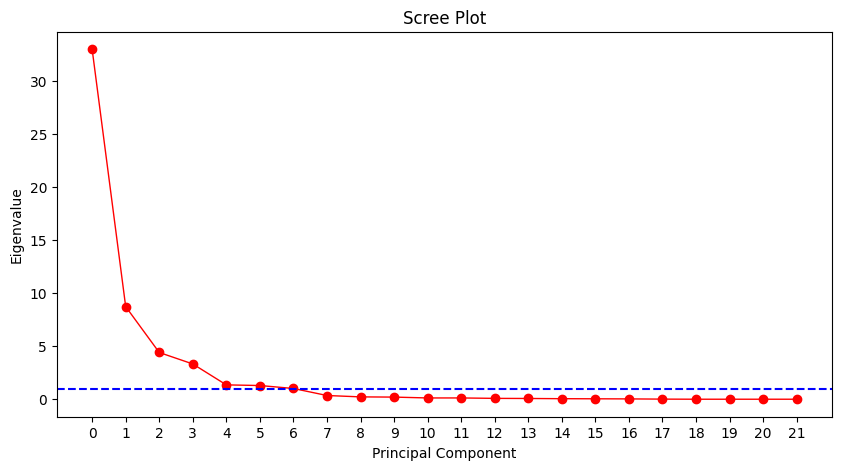

In [11]:

# scree plot of eigenvalues
# define the x values, i.e., components
#Eigenvalues are given by the PCA explained_variance_ method
eig = pca.explained_variance_.round(2) #explained variance method

xvals = np.arange(df_pca.shape[1]);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue for latent root criterion
plt.axhline(y=1, color='b', linestyle='--')

#look for inflection point --> 2 is the major inflection point 
# philip said keep points before this --> that is 2 

In [12]:
# Fit PCA for all components (you already have this)
pca = PCA(n_components=5)
pca.fit(df_pca)

# Extract loadings (weights of variables for each PC)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align variables with components
    columns=[f"PC{i+1}" for i in range(5)],  # Name components as PC1, PC2, ...
    index=df_pca.columns  # Original variable names
)

# Display loadings
print(loadings)

                            PC1       PC2       PC3       PC4       PC5
drought_frq           -0.073423  0.411487  0.473530  0.716780 -0.006698
aridity                0.106946 -0.237886 -0.228291  0.293160 -0.265091
coef_variation        -0.002463  0.002228  0.010931 -0.003342  0.005066
lpa_total_rainfall     0.080745 -0.170391 -0.304193  0.281602 -0.243745
rainfall_2020          0.062678 -0.157606 -0.271970  0.350438 -0.240063
avg_tmax_annual       -0.098832  0.419695 -0.329346  0.039798  0.168399
lpa_tmax_90th_temp    -0.100797  0.446441 -0.360697  0.041502  0.172919
rugged                 0.004382 -0.017725  0.019579  0.000265  0.009246
elev_mean              0.040345 -0.269500  0.492190 -0.055184  0.055960
bdod                  -0.059038  0.177918  0.109104 -0.065180 -0.151120
cec                   -0.015680  0.084219  0.097363  0.066426  0.041438
cfvo                   0.019848 -0.032343  0.128074  0.088556 -0.083272
clay                  -0.002199  0.035447 -0.041375  0.083612  0

In [13]:
# Add PCA scores to the DataFrame with renamed components
pca_scores = pca.transform(df_pca)

# Assign PCA scores to their respective components
for i, name in enumerate(loadings.columns):
    df_scaled[f"Drought_Exposure_{name}"] = pca_scores[:, i]

# Check the updated DataFrame
print(df_scaled.head())

   drought_frq   aridity  coef_variation  lpa_total_rainfall  rainfall_2020  \
0            0  3.234913        0.255144            2.247676       0.841433   
1            0  3.641722        0.212023            3.267434       3.441360   
2            5 -0.917198        0.282370           -1.051880      -1.227252   
3            5 -0.931441        0.277978           -1.142575      -1.309155   
4            5 -0.999285        0.282176           -1.289575      -1.438027   

   avg_tmax_annual  lpa_tmax_90th_temp    rugged  elev_mean      bdod  ...  \
0        -0.468580           -0.649639  0.026772  -0.286880 -1.933604  ...   
1        -1.918980           -2.112701  0.009366  -0.416270 -2.083881  ...   
2         1.080175            1.124035  0.005197   0.550506  0.484700  ...   
3         0.744282            0.734647  0.000130   0.807783  0.359293  ...   
4         0.595546            0.528578  0.000490   0.908361  0.249293  ...   

        ocd       ocs  crop_fraction  forest_fraction  g

In [14]:
# Multiply each PCA component score by its weight
df["Drought_Exposure_Index"] = (
    PCA_weights[0] * df_scaled["Drought_Exposure_PC1"] +
    PCA_weights[1] * df_scaled["Drought_Exposure_PC2"] +
    PCA_weights[2] * df_scaled["Drought_Exposure_PC3"] +
    PCA_weights[3] * df_scaled["Drought_Exposure_PC4"] +
    PCA_weights[4] * df_scaled["Drought_Exposure_PC5"]
)

# Display the flood_exposure Index
print(df[["block_code", "Drought_Exposure_Index"]].head())

   block_code  Drought_Exposure_Index
0        6498               20.439935
1        6492               17.884317
2        4689                0.211556
3        4690               -0.781058
4        4692               -0.714904


In [15]:
df["Drought_Exposure_Index"].describe()


count    5.815000e+03
mean    -1.955062e-16
std      3.519394e+00
min     -1.614346e+00
25%     -1.049477e+00
50%     -7.605656e-01
75%     -3.368065e-01
max      2.751837e+01
Name: Drought_Exposure_Index, dtype: float64